In [56]:
# Import libraries and dependencies
import pandas as pd
import requests
from dotenv import load_dotenv
import os 
import json
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline
pn.extension('plotly')
import hvplot.pandas

## Reading in Data

In [2]:
#Reading in CSV files
BXP_REC1_data = Path("BXP2000.csv")
BXP_REC2_data = Path("BXP2007.csv")
GC_REC1_data = Path("GC_2000.csv")
GC_REC2_data = Path("GC_2007.csv")
HP_REC1_data = Path("hp_2000.csv")
HP_REC2_data = Path("hp_2007.csv")
PLD_REC1_data = Path("PLD_2000.csv")
PLD_REC2_data = Path("PLD_2007.csv")
WELL_REC1_data = Path("WELL_2000.csv")
WELL_REC2_data = Path("WELL_2007.csv")


BXPR1_df = pd.read_csv(BXP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BXPR2_df = pd.read_csv(BXP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR1_df = pd.read_csv(GC_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR2_df = pd.read_csv(GC_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR1_df = pd.read_csv(HP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR2_df = pd.read_csv(HP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR1_df = pd.read_csv(PLD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR2_df = pd.read_csv(PLD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR1_df = pd.read_csv(WELL_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR2_df = pd.read_csv(WELL_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


## API Data Pull for S&P500, Gold, and Bonds

In [47]:
# API Data Pull

## Requests URLs
sp500_url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_INFLADJ_MONTH.json?api_key=ACX1MxGcHSzdXsTV8JPU&start_date=1990-01-01&end_date=2014-03-01"
gold_url = "https://www.quandl.com/api/v3/datasets/LBMA/GOLD.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01&column_index=Date&column_index=USD (PM)"
bond_url = "https://www.quandl.com/api/v3/datasets/FRED/THREEFYTP10.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01"

## Convert to DataFrames
sp500_data = pd.DataFrame(requests.get(sp500_url).json()["dataset"]["data"])
sp500_data.columns = ["Date", "SPY1"]
gold_data = pd.DataFrame(requests.get(gold_url).json()["dataset"]["data"])
gold_data.columns = ["Date", "Gold Prices"]
bond_data = pd.DataFrame(requests.get(bond_url).json()["dataset"]["data"])
bond_data.columns = ["Date", "10 yr Treasury Rate"]

## Set Indexes as Dates
sp500_data.set_index("Date", inplace=True)
sp500_data.sort_index(inplace=True)
gold_data.set_index("Date", inplace=True)
gold_data.sort_index(inplace=True)
bond_data.set_index("Date", inplace=True)
bond_data.sort_index(inplace=True)

## Convert Indexes to Datetime Format
sp500_data.index = pd.to_datetime(sp500_data.index)
gold_data.index = pd.to_datetime(gold_data.index)
bond_data.index = pd.to_datetime(bond_data.index)

## Split Data for Analysis
sp500_2000 = sp500_data.loc["2000-08-01":"2007-08-01"]
sp500_2007 = sp500_data.loc["2007-03-01":"2014-03-01"]
gold_2000 = gold_data.loc["2000-08-01":"2007-08-01"]
gold_2007 = gold_data.loc["2007-03-01":"2014-03-01"]
bond_2000 = bond_data.loc["2000-08-01":"2007-08-01"]
bond_2007 = bond_data.loc["2007-03-01":"2014-03-01"]

## 2000 Recession Checking, Cleaning, and Concatenating Data

In [48]:
#Check S&P Data Head
sp500_2000.head()

,SPY1
Date,
2000-08-01,2216.13
2000-09-01,2178.81
2000-10-01,2059.62
2000-11-01,2040.52
2000-12-01,1971.90


In [49]:
#Check S&P Data Tail
sp500_2000.tail()

,SPY1
Date,
2007-04-01,1825.58
2007-05-01,1873.38
2007-06-01,1873.53
2007-07-01,1882.08
2007-08-01,1803.59


In [37]:
#Check Bond Data Head
bond_2000.head()

,10 yr Treasury Rate
Date,
2000-08-31,0.7798
2000-09-30,0.8196
2000-10-31,0.7203
2000-11-30,0.5839
2000-12-31,0.5212


In [9]:
#Check Bond Data Tail
bond_2000.tail()

,10 yr Treasury Rate
Date,
2007-03-31,0.3278
2007-04-30,0.3334
2007-05-31,0.5240
2007-06-30,0.6336
2007-07-31,0.4536


In [10]:
#Check BXP Head
BXPR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,41.3125,43.1875,40.3125,40.4375,16.520470,4242400
2000-09-01,40.6250,43.5000,39.9375,42.9375,17.541821,2845700
2000-10-01,43.0000,43.0625,38.6250,40.5000,16.754633,11022800
2000-11-01,40.5000,42.6875,40.0000,42.4375,17.556162,6310400
2000-12-01,42.6250,44.8750,41.3125,43.5000,17.995707,4183600


In [11]:
BXPR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,118.000000,120.510002,113.160004,117.400002,71.803688,24263000
2007-04-01,117.410004,119.949997,114.779999,117.559998,72.326347,16537700
2007-05-01,117.709999,118.000000,106.410004,115.680000,71.169739,25649800
2007-06-01,115.680000,118.000000,97.940002,102.129997,62.833351,28620300
2007-07-01,102.459999,108.250000,92.190002,94.489998,58.530727,25653600


In [12]:
#Drop BXP Extra Columns
BXPR1_df = BXPR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BXPR1_df.head()

,Close
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [13]:
#Rename BXP 'Close' to 'BXP Price'
BXPR1_price = BXPR1_df.rename(columns={
    "Date": "Date", "Close": "BXR1"})
BXPR1_price.head()

,BXR1
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [40]:
#Check GCR Head
GCR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,278.399994,269.000000,273.600006,273.600006,4291
2000-10-01,272.799988,276.399994,264.299988,264.899994,264.899994,321
2000-11-01,263.899994,270.200012,263.899994,270.100006,270.100006,32465
2000-12-01,269.700012,276.000000,268.000000,272.000000,272.000000,1664
2001-01-01,268.399994,268.399994,262.799988,265.600006,265.600006,17811


In [41]:
#Check GCR Tail
GCR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,673.000000,673.000000,640.000000,663.000000,663.000000,52996
2007-04-01,665.500000,692.500000,656.099976,680.500000,680.500000,4436
2007-05-01,673.700012,688.000000,651.000000,661.000000,661.000000,158741
2007-06-01,661.500000,674.000000,640.000000,648.099976,648.099976,4027
2007-07-01,656.799988,684.200012,648.400024,666.900024,666.900024,138110


In [45]:
#Drop GCR Extra Columns
GCR1_df = GCR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR1_df.head()

,Close
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [46]:
#Rename GCR Columns
GCR1_price = GCR1_df.rename(columns={
    "Date": "Date", "Close": "GCR1"})
GCR1_price.head()

,GCR1
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [14]:
#Check HPR Head
HPR1_df.head()

,Price
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [15]:
#Check HPR Tail
HPR1_df.tail()

,Price
Date,
2007-04-01,182.134
2007-05-01,181.888
2007-06-01,181.545
2007-07-01,181.000
2007-08-01,180.242


In [16]:
#Rename HPR Columns
HPR1_price = HPR1_df.rename(columns={
    "Date": "Date", "Price": "HPR1"})
HPR1_price.head()

,HPR1
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [17]:
#Check PLD Head
PLDR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,23.9375,24.4375,23.7500,24.1875,10.901503,4587600
2000-09-01,24.2500,25.0000,24.0625,24.5625,11.070519,2942600
2000-10-01,24.1250,24.3750,22.8125,23.5000,10.591641,2644900
2000-11-01,23.5000,23.8125,22.5000,23.8125,10.896631,4513600
2000-12-01,23.7500,26.0625,23.3125,25.8125,11.811835,4812400


In [18]:
#Check PLD Tail
PLDR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-01,58.790001,62.830002,58.669998,60.910000,38.054497,13907400
2007-05-01,61.000000,61.709999,54.380001,57.849998,36.449158,14795300
2007-06-01,57.919998,59.779999,51.529999,53.220001,33.531956,15624000
2007-07-01,55.200001,57.209999,52.130001,53.279999,33.569748,20184500
2007-08-01,52.599998,55.549999,48.099998,54.980000,34.954086,26092200


In [19]:
#Drop PLD Extra Columns
PLDR1_df = PLDR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PLDR1_df.head()

,Close
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [20]:
#Rename PLD Columns
PLDR1_price = PLDR1_df.rename(columns={
    "Date": "Date", "Close": "PLDR1"})
PLDR1_price.head()

,PLDR1
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [21]:
#Check Well Head
WELLR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,18.0000,19.2500,17.8125,18.0625,5.255765,1531900
2000-09-01,18.0000,19.0000,17.6875,17.7500,5.164836,1215400
2000-10-01,17.8125,18.2500,16.4375,17.6875,5.146647,1338000
2000-11-01,17.5625,17.7500,16.5000,16.8750,5.078803,1042500
2000-12-01,16.8750,17.1875,15.9375,16.2500,4.890700,1698400


In [22]:
#Check WELL Tail
WELLR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,44.810001,45.779999,42.630001,43.900002,21.475824,13075300
2007-04-01,43.900002,45.799999,43.130001,45.240002,22.131353,13722000
2007-05-01,45.240002,45.500000,42.060001,43.770000,21.412224,19442600
2007-06-01,43.799999,44.099998,38.639999,40.360001,20.039820,12642200
2007-07-01,40.650002,42.369999,35.869999,36.709999,18.227501,19770300


In [23]:
#Drop WELL Extra Columns
WELLR1_df = WELLR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
WELLR1_df.head()

,Close
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [24]:
#Rename WELL Columns
WELLR1_price = WELLR1_df.rename(columns={
    "Date": "Date", "Close": "WELLR1"})
WELLR1_price.head()

,WELLR1
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [51]:
#Concat Cleaned Data Frames
combined_port = pd.concat([BXPR1_price, HPR1_price, GCR1_price, PLDR1_price, WELLR1_price, sp500_2000,],axis="columns", join="inner")
combined_port.head()

,BXR1,HPR1,GCR1,PLDR1,WELLR1,SPY1
Date,,,,,,
2000-09-01,42.937500,107.135,273.600006,24.5625,17.7500,2178.81
2000-10-01,40.500000,107.728,264.899994,23.5000,17.6875,2059.62
2000-11-01,42.437500,108.291,270.100006,23.8125,16.8750,2040.52
2000-12-01,43.500000,108.792,272.000000,25.8125,16.2500,1971.90
2001-01-01,40.599998,109.215,265.600006,24.6500,18.5000,1966.43


# 2000 Recession Statistical Analyses

## 2000 Asset Class Returns

In [72]:
#Calculate Monthly Returns from Asset Classes
monthly_returns = combined_port.pct_change()
monthly_returns.head(10)

,BXR1,HPR1,GCR1,PLDR1,WELLR1,SPY1
Date,,,,,,
2000-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-01,-0.056769,0.005535,-0.031798,-0.043257,-0.003521,-0.054704
2000-11-01,0.047840,0.005226,0.019630,0.013298,-0.045936,-0.009274
2000-12-01,0.025037,0.004626,0.007034,0.083990,-0.037037,-0.033629
2001-01-01,-0.066667,0.003888,-0.023529,-0.045036,0.138462,-0.002774
2001-02-01,-0.006404,0.003919,0.004518,0.002434,0.031351,-0.026266
2001-03-01,-0.046852,0.006850,-0.033358,-0.004452,0.090147,-0.093885
2001-04-01,0.027568,0.007736,0.023653,0.012195,0.122596,-0.000605
2001-05-01,0.009365,0.008584,0.004924,-0.008032,-0.026124,0.062873


In [76]:
#Print the Average Monthly Returns
print(monthly_returns.mean()*100)

BXR1      1.105669
HPR1      0.642773
GCR1      1.172086
PLDR1     1.055149
WELLR1    1.052755
SPY1     -0.113002
dtype: float64


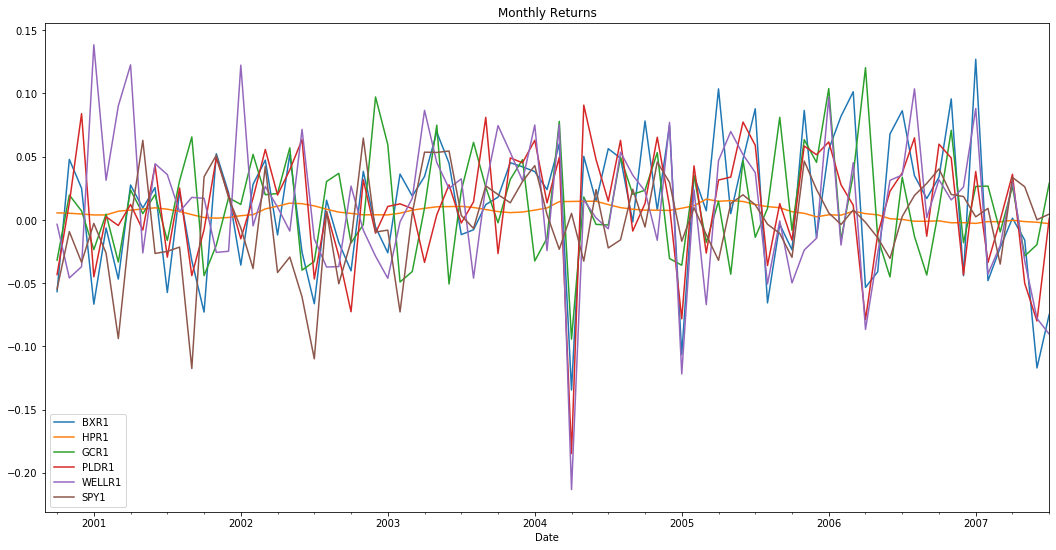

In [81]:
#Visualize the Monthly Return Relationships
monthly_returns.plot(figsize=(18,9), title = 'Monthly Returns')

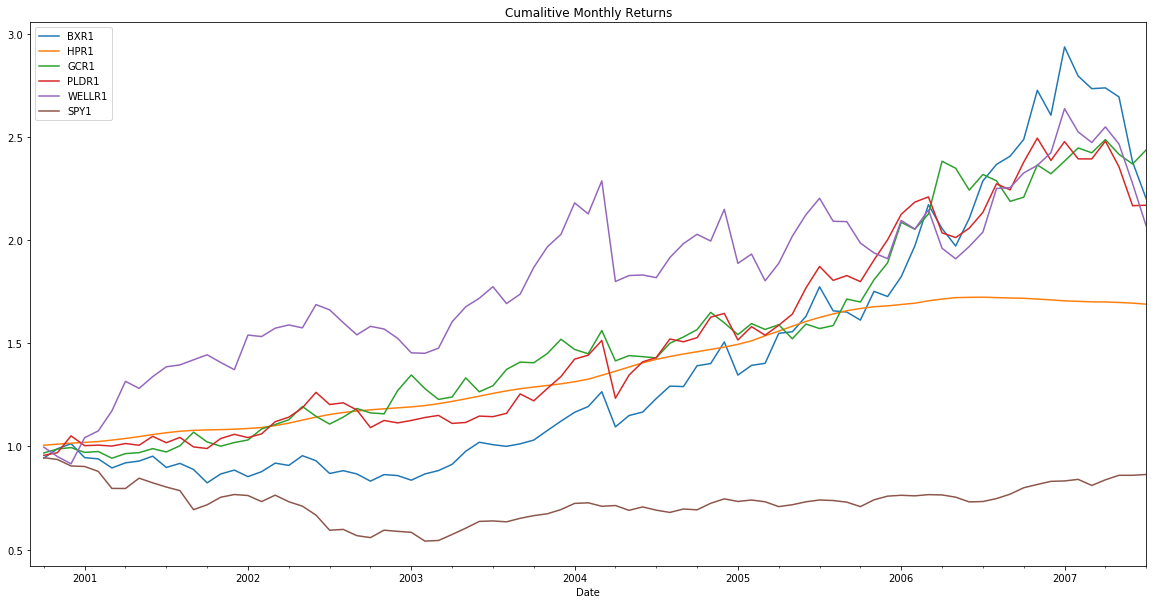

In [83]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns = (1 + monthly_returns).cumprod()
cumulative_returns.plot(figsize= (20,10), title = 'Cumalitive Monthly Returns')

## 2000 Asset Class Risk Analysis

In [99]:
#Calculate Monthly Standard Deviation of Each Asset Class
monthly_std = monthly_returns.std()
print(monthly_std *100)

BXR1      5.294020
HPR1      0.494906
GCR1      4.046985
PLDR1     4.577576
WELLR1    5.683482
SPY1      3.597801
dtype: float64


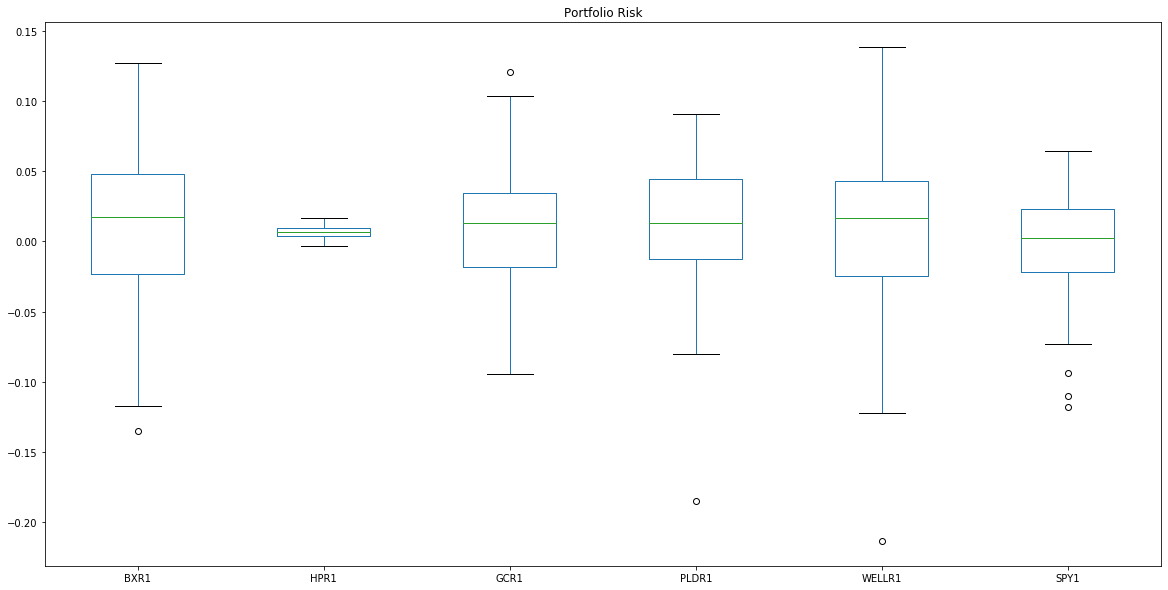

In [102]:
#Visualize Using a Box PLot
monthly_returns.plot.box(figsize=(20,10), title = 'Portfolio Risk')

In [118]:
#Sharpe Ratio Analysis
sharpe_ratios = ((monthly_returns)) / ((monthly_std))
print(sharpe_ratios.mean())

BXR1      0.208852
HPR1      1.298777
GCR1      0.289620
PLDR1     0.230504
WELLR1    0.185231
SPY1     -0.031409
dtype: float64


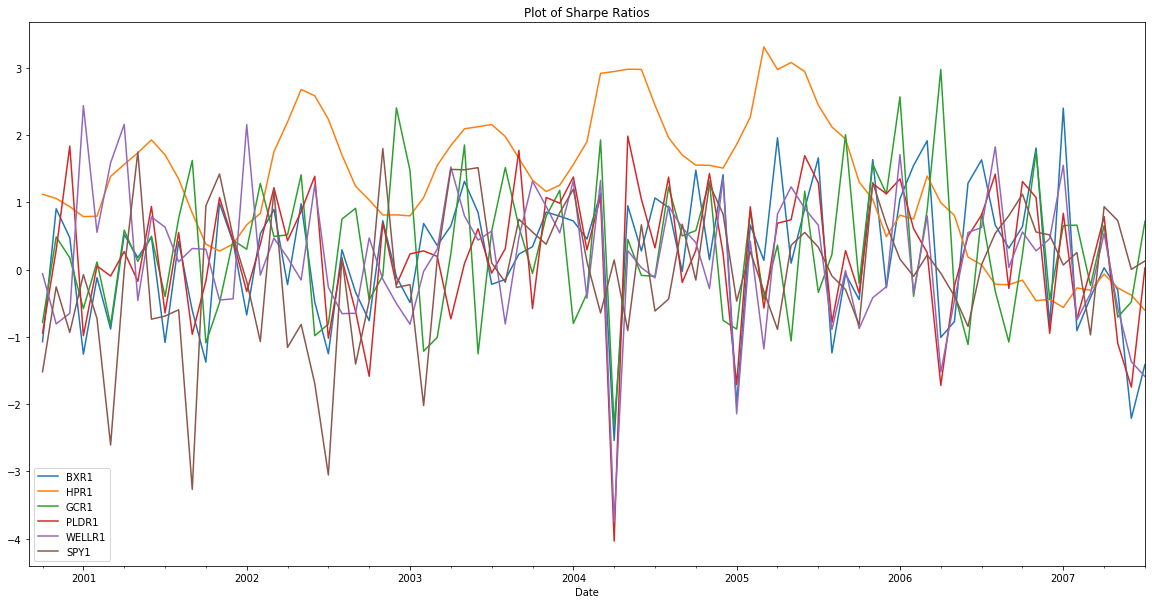

In [116]:
#Visualize Sharpe Ratios
sharpe_ratios.plot(figsize= (20,10), title = 'Plot of Sharpe Ratios')